In [1]:
source("../notebooks_filter/utils_high-depth.R")

Warning message:
“package ‘Cairo’ was built under R version 4.4.3”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading requir

In [2]:
#cell_data <- read_rds("../notebooks_high-depth-CS_filter/cell_data_df_LENGTH-filtered.rds")
cell_data <- read_rds("../notebooks_high-depth-CS_filter/cell_data_df_NBIN-filtered_15_fix_5c_chr.rds")
cell_data <- cell_data %>% mutate(CN_signal=RDR*gamma)

In [3]:
#seg_merged_data <- read_rds("../notebooks_high-depth-CS_filter/seg_merged_df_CN-LOH-fix.rds")

In [4]:
seg_merged_data <- read_rds("../notebooks_high-depth-CS_filter/seg_merged_df_NBIN-filtered_15_fix_5c_chr.rds")

In [5]:
seg_merged_data$CN_total <- NA

seg_merged_data$CN <- as.character(seg_merged_data$CN)

# Split CN into two numeric components
cn_split <- str_split(seg_merged_data$CN, "\\|")

# Extract alleles as numeric values
seg_merged_data$CN_A <- as.numeric(sapply(cn_split, `[`, 1))
seg_merged_data$CN_B <- as.numeric(sapply(cn_split, `[`, 2))

# Compute total copy number
sex_chr_mask <- seg_merged_data$chrom %in% c("X", "Y")
seg_merged_data$CN_A[sex_chr_mask & is.na(seg_merged_data$CN_A)] <- 0
seg_merged_data$CN_B[sex_chr_mask & is.na(seg_merged_data$CN_B)] <- 0

seg_merged_data$CN_total <- seg_merged_data$CN_A + seg_merged_data$CN_B
 
#seg_merged_data$CN_total[seg_merged_data$chrom %in% c("X", "Y")] <- as.integer(seg_merged_data$CN[seg_merged_data$chrom %in% c("X", "Y")])
seg_merged_data$is_LOH <- (seg_merged_data$chrom %in% c(1:22)) & (seg_merged_data$CN_A == 0 | seg_merged_data$CN_B == 0)
seg_merged_data$is_CNV <- (seg_merged_data$chrom %in% c(1:22)) & (seg_merged_data$CN != "1|1")
seg_merged_data$length <- seg_merged_data$end - seg_merged_data$start
seg_merged_data$is_gain <- (seg_merged_data$chrom %in% c(1:22)) & seg_merged_data$CN_total>2
seg_merged_data$is_loss <- (seg_merged_data$chrom %in% c(1:22)) & seg_merged_data$CN_total<2

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


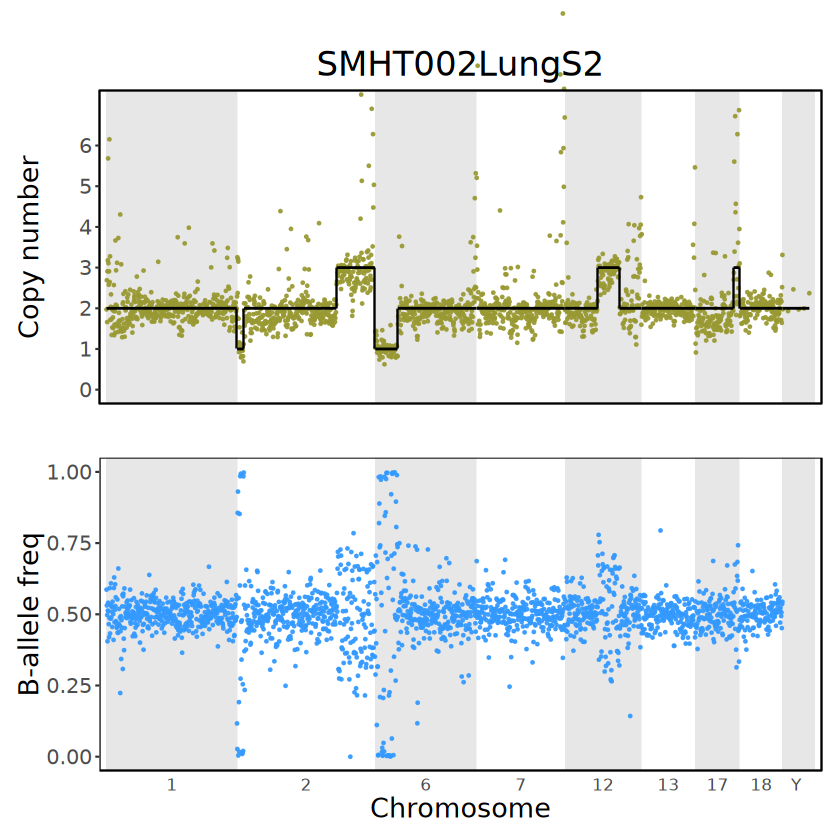

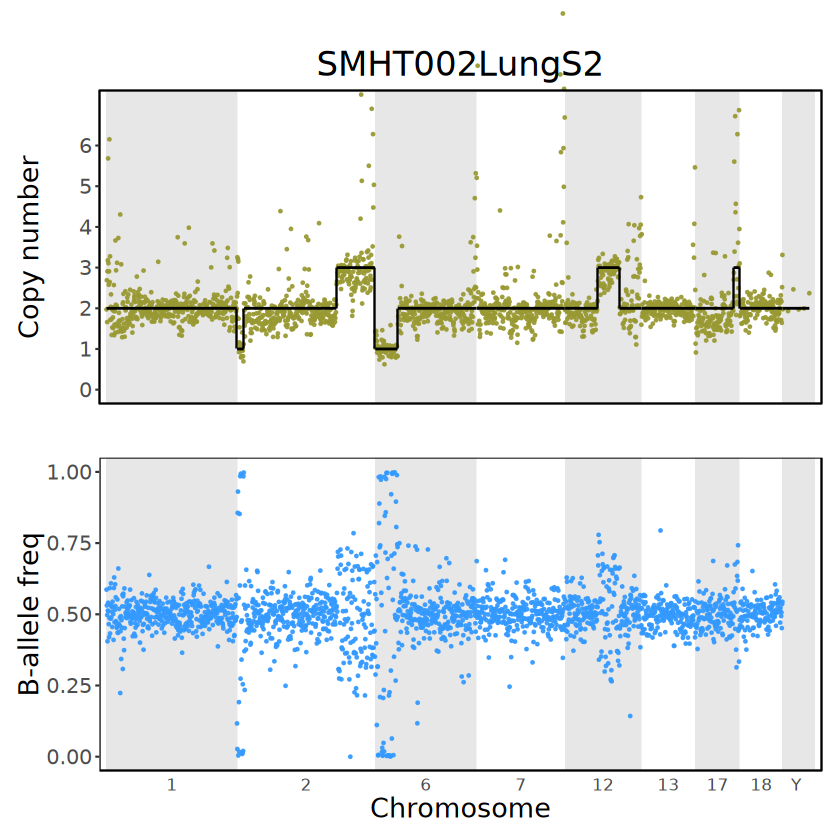

In [6]:
cell_name="SMHT002LungS2"
plot_cell2(
        cell_name,
        cell_name,
        cell_data,
        seg_merged_data,
        output_dir = NULL,
        print_plot = TRUE,
        chrom_list = c(1, 2, 6, 7, 12, 13, 17, 18, "Y") 
      )

In [7]:
seg_merged_data %>% filter(cell_name=="SMHT002LungS2", chrom %in% c(1, 2, 6, 7, 12, 13, 17, 18, "Y") ) %>% arrange(as.integer(chrom), start)

Warning message:
“There was 1 warning in `arrange()`.
ℹ In argument: `..1 = as.integer(chrom)`.
Caused by warning:
! NAs introduced by coercion”


start,end,CN,chrom,NBIN,RDR_SUM,RDR_MEAN,VAF_MEAN,VAF_ESTIMATE,sample,⋯,batch_name,cell_type,CN_total,CN_A,CN_B,is_LOH,is_CNV,length,is_gain,is_loss
<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<int>,<lgl>,<lgl>
10033,247782643,1|1,1,409,496.347168,1.2135628,0.9169575,0.40,ST002,⋯,batch-1_lung,lung,2,1,1,FALSE,FALSE,247772610,FALSE,FALSE
1054008,12338231,1|0,2,22,19.216350,0.8734705,0.3001974,0.00,ST002,⋯,batch-1_lung,lung,1,1,0,TRUE,TRUE,11284223,FALSE,TRUE
12338232,176918987,1|1,2,290,330.915114,1.1410866,0.4541865,NA,ST002,⋯,batch-1_lung,lung,2,1,1,FALSE,FALSE,164580755,FALSE,FALSE
176918988,239684372,2|1,2,121,238.259981,1.9690907,2.3246555,0.36,ST002,⋯,batch-1_lung,lung,3,2,1,FALSE,TRUE,62765384,TRUE,FALSE
89831,37432688,1|0,6,71,42.583542,0.5997682,0.1807530,0.00,ST002,⋯,batch-1_lung,lung,1,1,0,TRUE,TRUE,37342857,FALSE,TRUE
37432689,170740360,1|1,6,247,289.840093,1.1734417,0.9157551,NA,ST002,⋯,batch-1_lung,lung,2,1,1,FALSE,FALSE,133307671,FALSE,FALSE
10005,158676749,1|1,7,277,362.414849,1.3083569,2.7389937,0.48,ST002,⋯,batch-1_lung,lung,2,1,1,FALSE,FALSE,158666744,FALSE,FALSE
10019,59708479,1|1,12,103,116.211662,1.1282686,0.4620038,NA,ST002,⋯,batch-1_lung,lung,2,1,1,FALSE,FALSE,59698460,FALSE,FALSE
59708480,94997476,2|1,12,68,117.476778,1.7275997,0.3782768,0.32,ST002,⋯,batch-1_lung,lung,3,2,1,FALSE,TRUE,35288996,TRUE,FALSE


In [16]:
cell_data  %>% filter(cell_name=="SMHT002LungS2", CHROM=="Y")

CHROM,START,END,A,B,N,TOTAL,pBAF,BAF,MAJOR,⋯,prob,CN_A,CN_B,CN_total,gamma,sample,cell_name,batch_name,cell_type,CN_signal
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
Y,2781484,5170064,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,2,1.661308,ST002,SMHT002LungS2,batch-1_lung,lung,1.976194
Y,5170065,7105528,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,2,1.661308,ST002,SMHT002LungS2,batch-1_lung,lung,1.931385
Y,7105529,7724094,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,2,1.661308,ST002,SMHT002LungS2,batch-1_lung,lung,2.465244
Y,7724095,8244768,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,2,1.661308,ST002,SMHT002LungS2,batch-1_lung,lung,1.971369
Y,8244769,8761371,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,2,1.661308,ST002,SMHT002LungS2,batch-1_lung,lung,1.996621
Y,8761372,9656377,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,2,1.661308,ST002,SMHT002LungS2,batch-1_lung,lung,2.370879


In [8]:
library(Cairo)

In [17]:
plot_cell2_supplementary_coord <- function(cell_name, title, cell_data, seg_merged_data, cnv_presence = NULL,
                                           output_dir = NULL, print_plot = TRUE, chrom_list = c(1:22, "X", "Y"),
                                           show_segments = TRUE) {
  library(dplyr)
  library(ggplot2)
  library(patchwork)

  category_colors <- c(
    "Aneuploidy"  = "#F0E442",  # yellow
    "CN-LOH"      = "#009E73",  # green
    "Deletion"    = "#56B4E9",  # blue
    "Duplication" = "#D55E00"   # red-orange
  )

  max_y <- 4
  max_y_offset <- 0.25

  # Keep naming consistent (remove "chr" prefix if present)
  cell_data$CHROM <- gsub("^chr", "", cell_data$CHROM)
  seg_merged_data$chrom <- gsub("^chr", "", seg_merged_data$chrom)

  cell_df <- cell_data[cell_data$cell_name == cell_name & cell_data$CHROM %in% chrom_list, ]
  seg_df  <- seg_merged_data[seg_merged_data$cell_name == cell_name & seg_merged_data$chrom %in% chrom_list, ]

  cell_df$CHROM <- factor(cell_df$CHROM, levels = chrom_list)
  seg_df$chrom  <- factor(seg_df$chrom,  levels = chrom_list)

  # --- Scaling factors for chromosomes ---
  scale_factor <- function(chr) {
    if (chr == "Y") return(5)
    if (chr == "X") return(2)
    return(1)
  }

  # --- Apply scaling to bins ---
  cell_df <- cell_df %>%
    mutate(scale = sapply(as.character(CHROM), scale_factor),
           START = START * scale,
           END   = END   * scale,
           midpoint = (START + END) / 2)

  # --- Chromosome sizes + offsets ---
  chrom_sizes <- cell_df %>%
    group_by(CHROM) %>%
    summarise(chr_len = max(END, na.rm = TRUE), .groups = "drop") %>%
    arrange(match(CHROM, chrom_list)) %>%
    mutate(offset = lag(cumsum(chr_len), default = 0))

  # --- Concatenated Mb coordinates ---
  cell_df <- cell_df %>%
    left_join(chrom_sizes, by = "CHROM") %>%
    mutate(x = (midpoint + offset) / 1e6)

  # --- Backgrounds (seamless, alternating) ---
  chrom_backgrounds <- chrom_sizes %>%
    mutate(
      xmin = offset / 1e6,
      xmax = (offset + chr_len) / 1e6,
      fill = as.factor(row_number() %% 2)
    )

  # --- Chromosome centers ---
  chrom_centers <- chrom_backgrounds %>%
    mutate(center = (xmin + xmax) / 2)

  x_breaks <- chrom_centers$center
  x_labels <- chrom_centers$CHROM

  # --- Apply scaling to segments ---
  seg_df <- seg_df %>%
    mutate(scale = sapply(as.character(chrom), scale_factor),
           start = start * scale,
           end   = end   * scale) %>%
    left_join(chrom_sizes, by = c("chrom" = "CHROM")) %>%
    mutate(
      x_start = (start + offset) / 1e6,
      x_end   = (end   + offset) / 1e6
    ) %>%
    filter(!is.na(x_start), !is.na(x_end))

  cn_path_df <- seg_df %>%
    mutate(segment_id = row_number()) %>%
    tidyr::pivot_longer(cols = c(x_start, x_end),
                        names_to = "point", values_to = "x") %>%
    arrange(segment_id, x) %>%
    mutate(y = CN_total)

  jump_df <- seg_df %>%
    arrange(chrom, start) %>%
    mutate(
      next_CN    = lead(CN_total),
      next_chrom = lead(chrom),
      next_x     = lead(x_start)
    ) %>%
    filter(!is.na(next_CN)) %>%
    filter(chrom != next_chrom | abs(CN_total - next_CN) > 1e-3) %>%
    transmute(
      x    = x_end,
      xend = x,
      y    = pmin(CN_total, max_y),
      yend = pmin(next_CN, max_y)
    )

  # --- CNV presence markers ---
  if (!is.null(cnv_presence) && nrow(cnv_presence) > 0) {
    x_min <- min(cell_df$x, na.rm = TRUE)
    x_max <- max(cell_df$x, na.rm = TRUE)
    n_squares <- nrow(cnv_presence)
    total_space <- (x_max - x_min) * 0.1
    x_spacing <- total_space / max(n_squares - 1, 1)

    cnv_presence <- cnv_presence %>%
      mutate(
        x = x_min + (row_number() - 0.75) * x_spacing,
        y = max_y
      )
  }

  # --- CN track ---
  cell_df <- cell_df %>%
    mutate(above_max_y = CN_signal > max_y,
           CN_signal   = pmin(CN_signal, max_y))

  p1 <- ggplot() +
    geom_rect(data = chrom_backgrounds,
              aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf, fill = fill),
              alpha = 0.5, inherit.aes = FALSE) +
    scale_fill_manual(values = c("white", "#D0D0D0"), guide = "none") +
    geom_point(data = cell_df,
               aes(x = x, y = CN_signal, shape = factor(above_max_y)),
               color = "#999933", size = 0.3, alpha = 0.9) +
    scale_shape_manual(values = c(16, 2), guide = "none") +
    {if (show_segments) geom_line(data = cn_path_df,
                                  aes(x = x, y = y, group = segment_id),
                                  color = "black", size = 0.6)} +
    {if (show_segments) geom_segment(data = jump_df,
                                     aes(x = x, xend = xend, y = y, yend = yend),
                                     color = "black")} +
    {
      if (!is.null(cnv_presence) && nrow(cnv_presence) > 0) {
        geom_point(data = cnv_presence, aes(x = x, y = y, color = category),
                   shape = 15, size = 4)
      } else NULL
    } +
    scale_color_manual(values = category_colors) +
    scale_x_continuous(breaks = x_breaks, labels = x_labels, expand = c(0, 0)) +
    coord_cartesian(ylim = c(0, max_y + max_y_offset), clip = "off") +
    scale_y_continuous(breaks = c(0, 2, 4)) +
    labs(x = NULL, y = "Copy number") +
    theme_bw(base_size = 10) +
    theme(
      panel.grid = element_blank(),
      axis.text.y = element_text(size = 10),
      axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      plot.margin = margin(t = 25, r = 5, b = 0, l = 5),
      axis.line = element_blank(),
      plot.title = element_text(size = 20, hjust = 0.5),
      legend.position = "none"
    ) +
    ggtitle(title)

  # --- BAF track ---
  p2 <- ggplot() +
    geom_rect(data = chrom_backgrounds,
              aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf, fill = fill),
              alpha = 0.5, inherit.aes = FALSE) +
    scale_fill_manual(values = c("white", "#D0D0D0"), guide = "none") +
    geom_point(data = cell_df,
               aes(x = x, y = pBAF), color = "#3399FF", size = 0.3/4, alpha = 0.9) +
    scale_x_continuous(breaks = x_breaks, labels = x_labels, expand = c(0, 0)) +
    coord_cartesian(ylim = c(0, 1)) +
    labs(x = "Chromosome", y = "B-allele freq") +
    theme_bw(base_size = 10) +
    theme(
      panel.grid = element_blank(),
      axis.text.y = element_text(size = 10),
      plot.margin = margin(t = 0, r = 5, b = 5, l = 5),
      panel.border = element_rect(color = "black", fill = NA, linewidth = 0.5),
      axis.line = element_blank()
    )

  # --- Combine ---
  plot_output <- p1 / plot_spacer() / p2 + plot_layout(heights = c(1, 0.1, 1))

  if (!is.null(output_dir)) {
    ggsave(file.path(output_dir, paste0(cell_name, "_segment-", show_segments, "_track.png")),
           plot_output, width = 10, height = 4, dpi = 300)
    ggsave(file.path(output_dir, paste0(cell_name, "_segment-", show_segments, "_track.pdf")),
           plot_output, width = 10, height = 4, device = cairo_pdf)
  }
  if (print_plot) {
    print(plot_output)
  }
  return(plot_output)
}


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


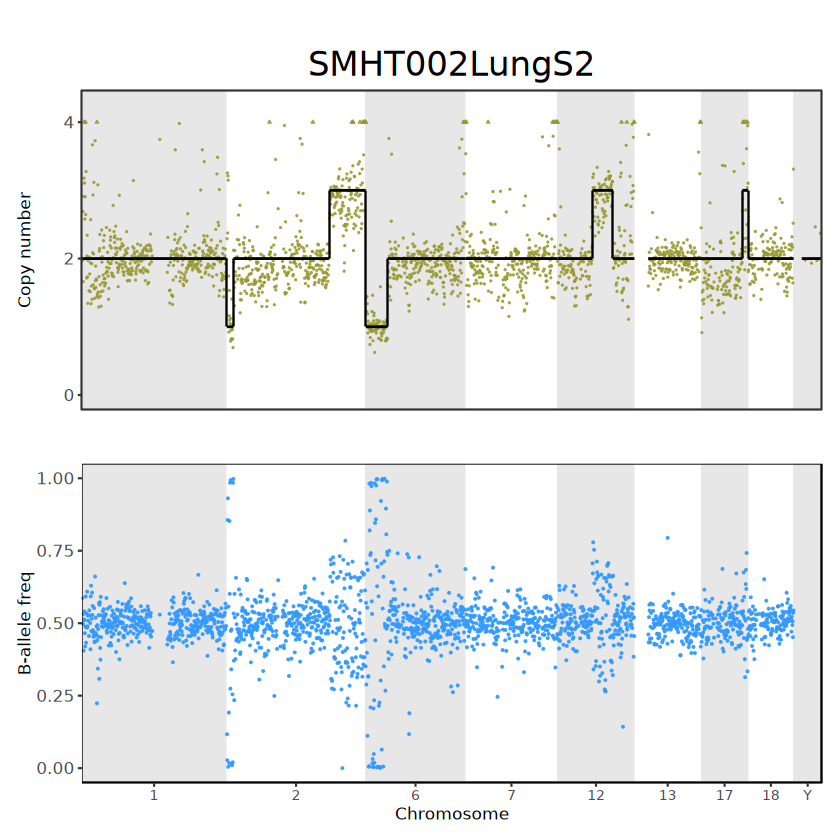

In [18]:
plot_cell2_supplementary_coord(
        cell_name,
        cell_name,
        cell_data,
        seg_merged_data,
        chrom_list = c(1, 2, 6, 7, 12, 13, 17, 18, "Y"),
        show_segments = TRUE,
        output_dir = "fig5_cell_plots", print_plot = FALSE)#,
        #cnv_presence=data.frame(category=c("Aneuploidy", "Deletion", "Duplication"))
      #)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


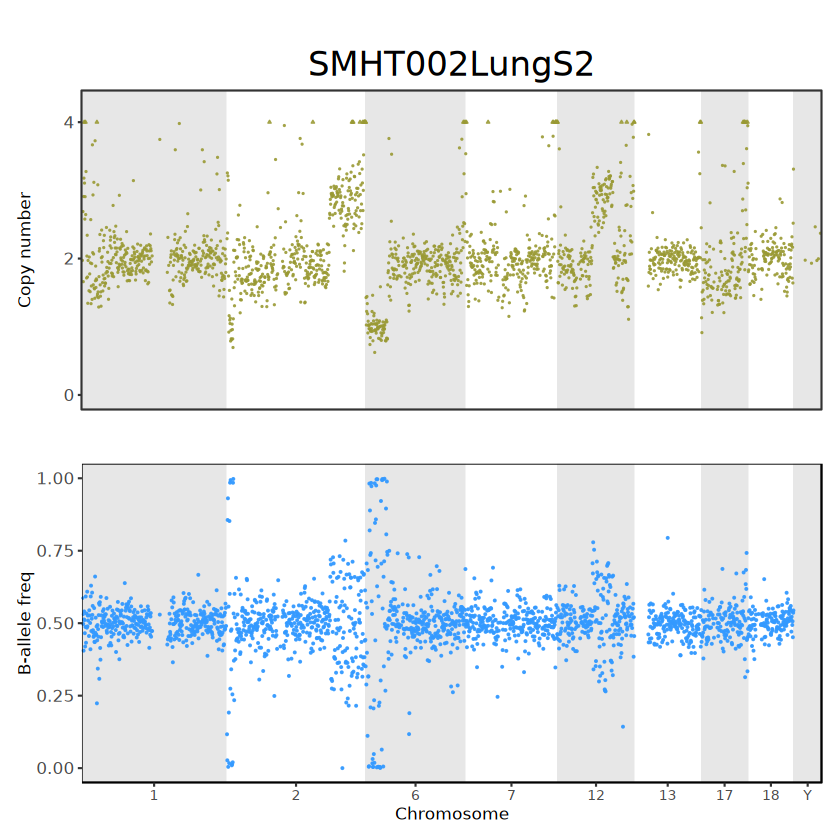

In [19]:
plot_cell2_supplementary_coord(
        cell_name,
        cell_name,
        cell_data,
        seg_merged_data,
        chrom_list = c(1, 2, 6, 7, 12, 13, 17, 18, "Y"),
        show_segments = FALSE,
        output_dir = "fig5_cell_plots", print_plot = FALSE)#,
        #cnv_presence=data.frame(category=c("Aneuploidy", "Deletion", "Duplication"))
      #)